<a href="https://colab.research.google.com/github/ElevenRitual-cyber/happy-sad-classifier/blob/main/happyorsad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from pathlib import Path

## Data Loading

In [81]:
data_path='/content/drive/MyDrive/DataFolders/data'

In [82]:
path=Path(data_path)
for item in path.iterdir():
  if item.is_dir():
    print(item)

/content/drive/MyDrive/DataFolders/data/happy
/content/drive/MyDrive/DataFolders/data/sad


## Reading all the images from happy class

In [83]:
# Assume `path` is a Path object pointing to the parent directory
for items in (path / "happy").iterdir():
  print(items)


/content/drive/MyDrive/DataFolders/data/happy/10-Habits-of-Happy-People-Seniors-Today.jpg
/content/drive/MyDrive/DataFolders/data/happy/2560px-Happy_People.jpg
/content/drive/MyDrive/DataFolders/data/happy/71hBPTAhIXL.jpg
/content/drive/MyDrive/DataFolders/data/happy/163-1635094_happiness-love-clip-art-happy-people-transparent-background.png
/content/drive/MyDrive/DataFolders/data/happy/56f455011e0000b300705475.jpeg
/content/drive/MyDrive/DataFolders/data/happy/20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
/content/drive/MyDrive/DataFolders/data/happy/compassion-900x387.jpg
/content/drive/MyDrive/DataFolders/data/happy/Happy-people.png
/content/drive/MyDrive/DataFolders/data/happy/GettyImages-871518740.jpg
/content/drive/MyDrive/DataFolders/data/happy/8e06de1bf2171da2312b6de61c61e4bc.jpg
/content/drive/MyDrive/DataFolders/data/happy/friends-happy-190821.jpg
/content/drive/MyDrive/DataFolders/data/happy/Your-Words-Affect-Your-Mind-10-Things-Happy-People-Say-Ev

## Reading all images of Sad Class

In [84]:
for item in (path/"sad").iterdir():
  print(item)

/content/drive/MyDrive/DataFolders/data/sad/21-214455_sad-person-png-transparent-sad-person-png-png.png
/content/drive/MyDrive/DataFolders/data/sad/14HRhniN7B7Fqx5GCoFpQ3A.jpeg
/content/drive/MyDrive/DataFolders/data/sad/1800x1200_visual_guide_to_seasonal_affective_disorder_sad_slideshow.jpg
/content/drive/MyDrive/DataFolders/data/sad/1000_F_221688877_urf6uWWBdLW3PVc8iBOrKuL4EfNlUg3F.jpg
/content/drive/MyDrive/DataFolders/data/sad/324867_1100-1100x628.jpg
/content/drive/MyDrive/DataFolders/data/sad/500x500.jpg
/content/drive/MyDrive/DataFolders/data/sad/792-7928301_depression-clipart-sad-person-clip-art.png
/content/drive/MyDrive/DataFolders/data/sad/5cd731f92100002f007a7304.jpeg
/content/drive/MyDrive/DataFolders/data/sad/806045-depression-sad-mood-sorrow-dark-people-love.jpg
/content/drive/MyDrive/DataFolders/data/sad/8884_sue.jpg
/content/drive/MyDrive/DataFolders/data/sad/2560px-Sad-Mental-Illness.jpg
/content/drive/MyDrive/DataFolders/data/sad/766x415_Depression_vs_Sadness-1-732x4

## Creating lables and converting images into numpy array

In [85]:
labels=[]
images=[]
for folder in path.iterdir():
  print(f"{folder.name}")
  for item in folder.iterdir():
    img=cv2.imread(item)
    if img is None:
      print("Cannot obtain the image as it is corrupted")
      continue
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image
    img=cv2.resize(img,(256,256))
    # Normalize the pixels
    img=img/255.0
    label=item.parent.name
    if label=='happy':
       labels.append(0)
    else:
      labels.append(1)


    images.append(img)


happy
sad


In [86]:
images = np.array(images)
labels = np.array(labels)

## Ploting an image from each class

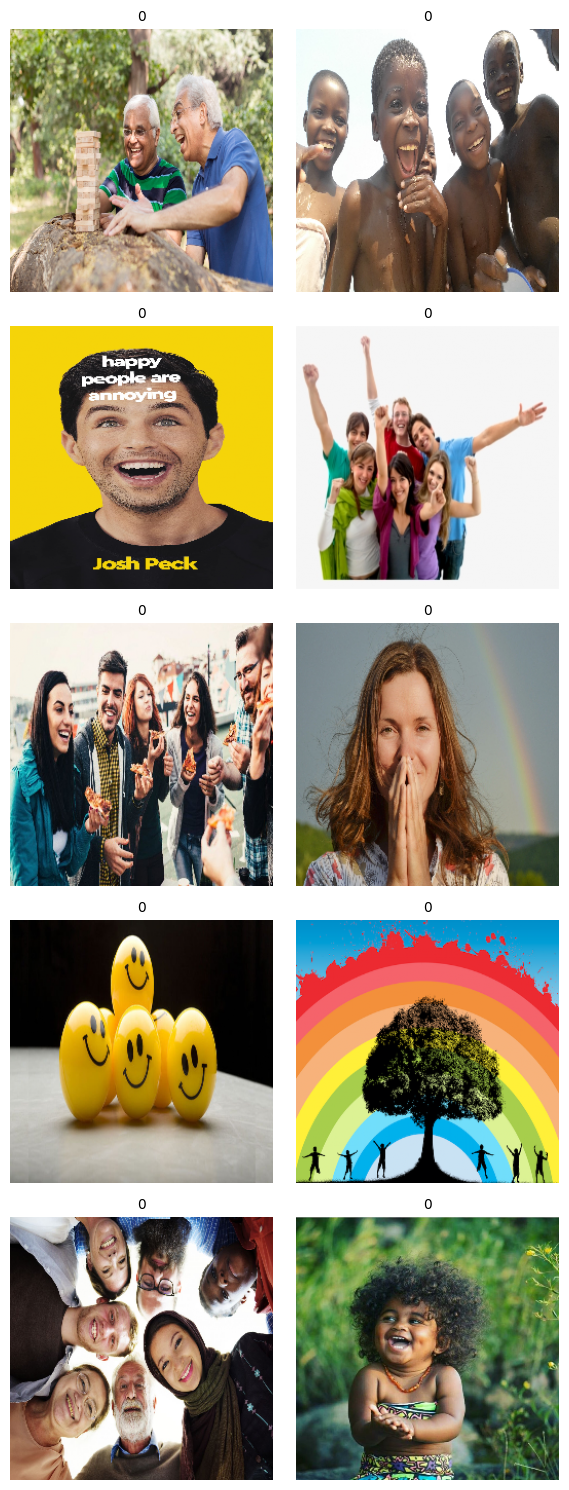

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(6, 15))

for i in range(10):
    row = i // 2
    col = i % 2

    ax[row][col].imshow(images[i])
    ax[row][col].set_title(labels[i], fontsize=10)
    ax[row][col].axis('off')

plt.tight_layout()
plt.show()


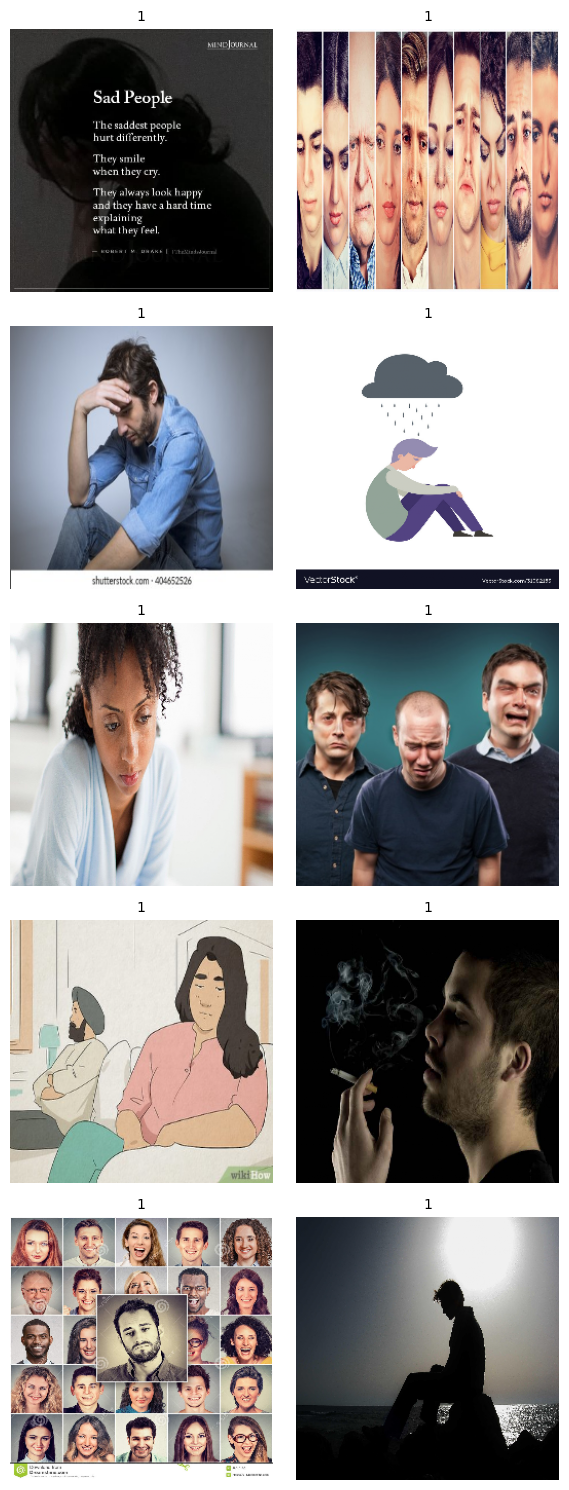

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(6, 15))

for i in range(10):
    row = i // 2
    col = i % 2

    ax[row][col].imshow(images[200+i])
    ax[row][col].set_title(labels[200+i], fontsize=10)
    ax[row][col].axis('off')

plt.tight_layout()
plt.show()


## Spliting the Data

In [89]:
from sklearn.model_selection import train_test_split

In [90]:


# First split: 60% train, 40% temp (to be split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.4, stratify=labels, random_state=42
)

# Second split: 20% val, 20% test from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [91]:
len(X_train),len(y_train),len(X_val),len(y_val),len(X_test),len(y_test)



(219, 219, 73, 73, 73, 73)

## Creating the Model


In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

In [93]:


model = Sequential([
    Input(shape=(256, 256, 3)),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    # Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    # Dropout(0.25),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    # Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    # Dropout(0.5),

    Dense(1, activation='sigmoid')
])


In [94]:
from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.003)  # you can adjust this value

model.compile(
    optimizer=optimizer,
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)


In [95]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.15,
    fill_mode='nearest'
)
datagen.fit(X_train)


In [97]:



# Use the generator ONLY for training data
hist = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,

    steps_per_epoch=len(X_train) // 32
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5310 - loss: 1.4817 - val_accuracy: 0.5342 - val_loss: 0.6861
Epoch 2/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4062 - loss: 0.6908

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.4062 - loss: 0.6908 - val_accuracy: 0.5068 - val_loss: 0.6763
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5282 - loss: 0.6802 - val_accuracy: 0.5342 - val_loss: 0.6462
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5000 - loss: 0.6233 - val_accuracy: 0.5479 - val_loss: 0.6527
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6519 - loss: 0.6037 - val_accuracy: 0.7808 - val_loss: 0.6690
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.7812 - loss: 0.5878 - val_accuracy: 0.7671 - val_loss: 0.7100
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7613 - loss: 0.5958 - val_accuracy: 0.7397 - val_loss: 0.6584
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.6562 - loss: 0.6338 - val_accuracy: 0.7397 - val_loss: 0.6564
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7453 - loss: 0.5954 - val_accuracy: 0.7671 - val_loss: 0.7677
Epoch 10/20
6

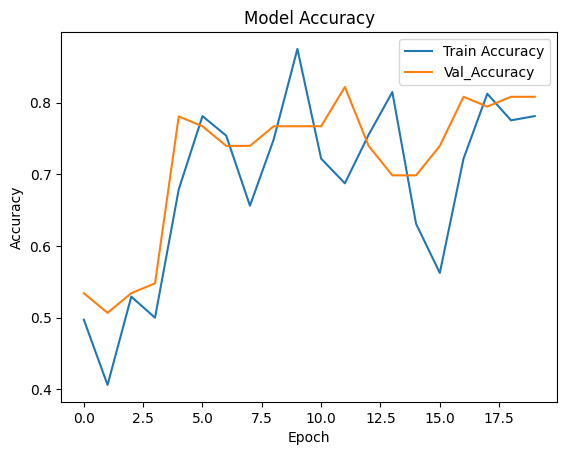

In [98]:
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

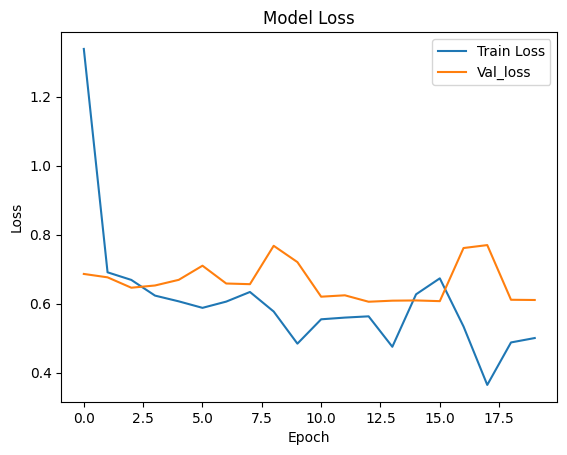

In [99]:
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [100]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [101]:
prec=Precision()
reca=Recall()
acc=BinaryAccuracy()

In [103]:
# Predict using your trained model
y_pred_probs = model.predict(X_test)          # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)     # Convert to binary predictions

# Reset states (important if reused)
prec.reset_state()
reca.reset_state()
acc.reset_state()

# Update metrics
prec.update_state(y_test, y_pred)
reca.update_state(y_test, y_pred)
acc.update_state(y_test, y_pred)

# Print results
print("Precision:", prec.result().numpy())
print("Recall:", reca.result().numpy())
print("Accuracy:", acc.result().numpy())


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
Precision: 0.7894737
Recall: 0.8333333
Accuracy: 0.8082192


In [104]:
from sklearn.metrics import confusion_matrix

In [106]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[29,  8],
       [ 6, 30]])

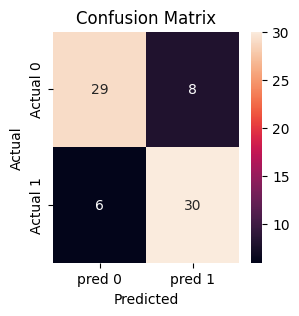

In [119]:
plt.figure(figsize=(3,3))
sns.heatmap(data=cm,annot=True,xticklabels=['pred 0','pred 1'],yticklabels=['Actual 0','Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Lets give me some images and check if it works


In [181]:
def preprocess(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.resize(img, (256, 256))  # now we overwrite 'img' directly
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # shape becomes (1, 256, 256, 3)
    return img


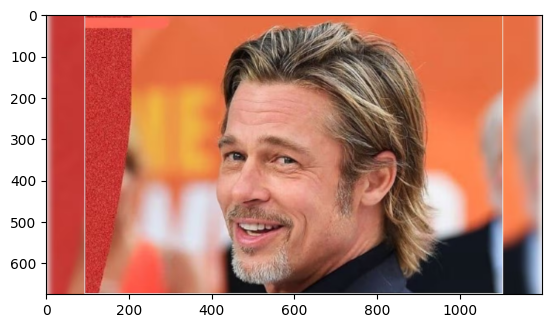

In [182]:

img=preprocess('/content/drive/MyDrive/DataFolders/brads.avif')

In [183]:
pred=model.predict(img)
if pred>0.5:
  print(f"The person in the image is sad")
else:
  print(f"The person in the image is Happy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The person in the image is Happy


In [176]:
model.save("/content/drive/MyDrive/DataFolders/data/happysad.keras")
!pwd

/content
